In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [254]:
# attr_name = 'charge_strength'
# attr_name = 'ellipse_aspect_ratio'
# attr_name = 'node_edge_strength'

fn = f'~/Downloads/{attr_name}.json'
df = pd.read_json(fn)
if attr_name == 'charge_strength':
    df[attr_name] = df[attr_name].abs()


df.head(6)

,edge_length_preservation,compactness,runtime,graph,ellipse_aspect_ratio,edge_mode
0,1.098321,0.003169,8.3350,lastfm,0.05,linear
1,0.791268,0.004684,7.9857,lastfm,0.10,linear
2,0.614778,0.009644,7.5731,lastfm,0.20,linear
3,0.442145,0.023920,7.2041,lastfm,0.50,linear
4,0.391108,0.043636,6.9915,lastfm,1.00,linear
5,0.351992,0.077755,6.7916,lastfm,2.00,linear


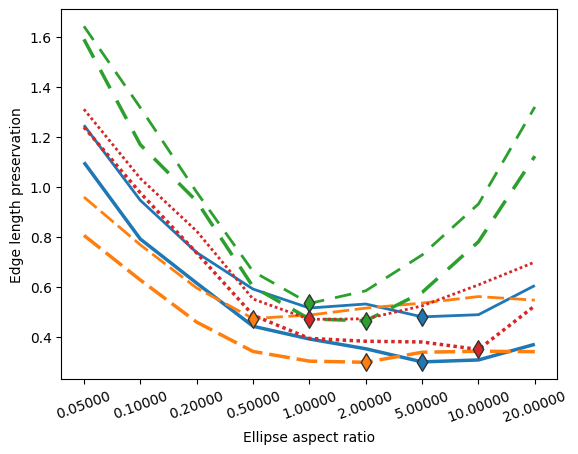

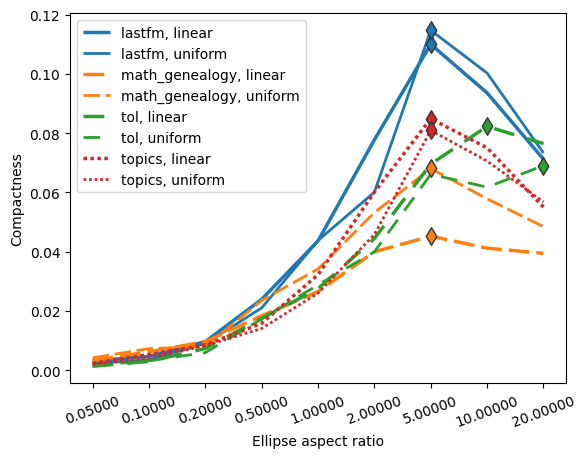

In [253]:
linestyles = [
    (0, ()),
    (0, (6, 2)),
    (0, (6, 4)),
    (0, (1, 1)),
]

attr_x = attr_name
xlabel = attr_x.replace('_', ' ').capitalize()
# xlabel = 'Ellipse aspect ratio'

for attr_y in ['edge_length_preservation', 'compactness']:
    
    ylabel = attr_y.replace('_', ' ').capitalize()
    if attr_y == 'edge_length_preservation':
        best = np.argmin
    else:
        best = np.argmax

    for i, [[graph, edge_mode], sub_df] in enumerate(df.groupby(['graph', 'edge_mode'])):
        n = len(sub_df)
        
        x = sub_df[attr_x].tolist()
        y = sub_df[attr_y].tolist()
        
        color = f'C{i//2}'
        linestyle = linestyles[i//2]
        linewidth = 2.5 if edge_mode == 'linear' else 2
        marker = '' if edge_mode == 'linear' else ''
        
        plt.plot(
            y,
            label=f'{graph}, {edge_mode}',
            color=color, marker=marker, 
            linewidth=linewidth,
            linestyle=linestyle, 
        )
        j = best(y)
        plt.scatter([j], y[j], s=80, c=color, lw=1, edgecolors='#333', marker='d', zorder=10)
        
        plt.xticks(np.arange(n), [f'{xi:.5f}' for xi in x], rotation=20)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
#     if attr_y == 'edge_length_preservation':
#         plt.legend()
    if attr_y == 'compactness':
        plt.legend()
    plt.savefig(f'{attr_x}-vs-{attr_y}.png', bbox_inches='tight')
    plt.show()
